# Regresión Lineal: Coste de un incidente de seguridad

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [7]:
import numpy as np

X = 2 * np.random.rand(100, 1) #Son los equipos afectados
y = 4 + 3 * X + np.random.randn(100, 1)  #Se corresponde con el coste que tuvo ese incidente

print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 100


### 2. Visualización del conjunto de datos

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

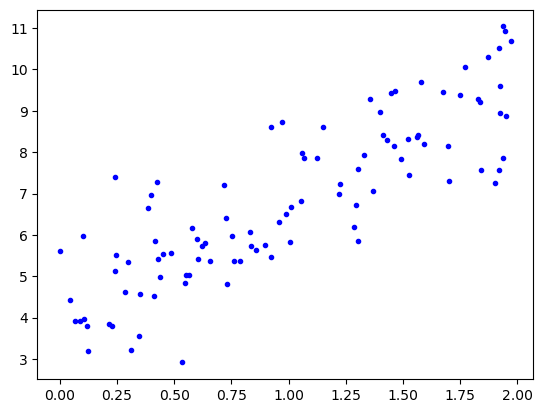

In [9]:
plt.plot(X, y, "b.")
plt.show()

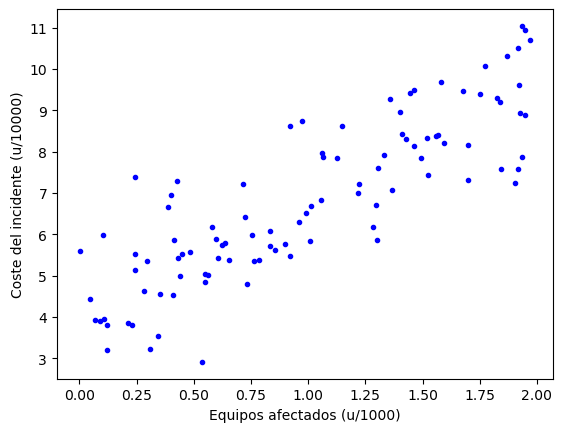

In [10]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")  # x1000
plt.ylabel("Coste del incidente (u/10000)")  # x10000
plt.show()

### 3. Modificación del conjunto de datos

In [11]:
import pandas as pd

In [12]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()}  #Convertimos nuestro conjunto de datos en un diccionario
df = pd.DataFrame(data)
df.head(10)  #Mostrar las 10 primeras filas del DataFrame

,n_equipos_afectados,coste
0,1.066362,7.865344
1,0.897133,5.756214
2,1.826579,9.290384
3,0.833477,6.077568
4,1.696650,8.150405
5,1.493440,7.845088
6,1.750370,9.386358
7,0.044819,4.430903
8,0.636442,5.795784
9,0.344522,3.542320


In [13]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1066,78653
1,897,57562
2,1826,92903
3,833,60775
4,1696,81504
5,1493,78450
6,1750,93863
7,44,44309
8,636,57957
9,344,35423


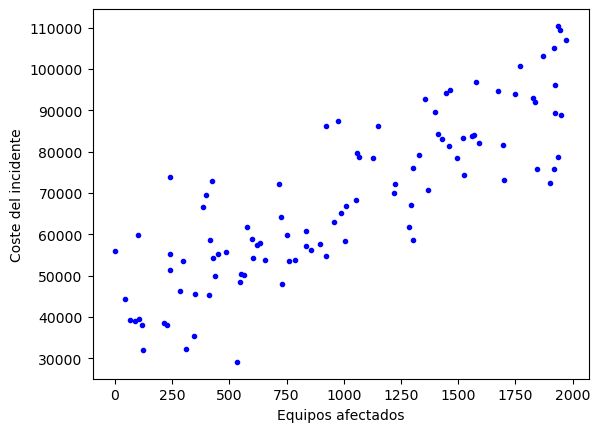

In [14]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

A continuación vamos a entrenar nuestro algoritmo de regresión lineal. Es un algoritmo basado en aprendizaje supervisado.

In [15]:
from sklearn.linear_model import LinearRegression

In [19]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values) #Le pasamos los valores de entrada y la 
                                                                       #etiqueta de salida para que ajuste el modelo
    
    
#The fit method fits a linear model to the data using least-squares regression, and calculates the coefficients for the linear 
#equation y = mx + b, where y is the dependent variable ('coste'), x is the independent variable ('n_equipos_afectados'), 
#m is the slope of the line, and b is the y-intercept of the line.


#The values attribute is used to convert these Pandas Series into NumPy arrays so that they can be used as input 
#to the LinearRegression class.

#The reshape(-1, 1) method is used to reshape the 'n_equipos_afectados' array from a 1D array to a 2D array with one column,
#which is the required input format for the fit method.



LinearRegression()

In [20]:
# Parámetro theta 0
lin_reg.intercept_  #Con .intercept_ accedemos al valor óptimo de theta 0 (punto de corte eje y)

40615.83779339578

In [21]:
# Parámetro theta 1
lin_reg.coef_   #Con .coef_ accedemos al valor óptimo de theta 1 (pendiente de la función)

array([27.69287247])

In [22]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max) #Usamos predict para representar la función hipótesis que se ha generado

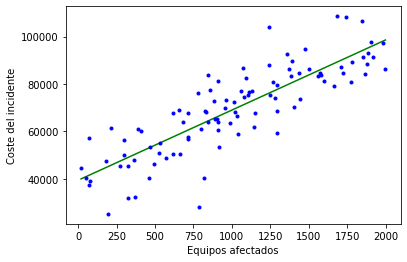

In [14]:
# Representación gráfica de la función hipótesis generada

plt.plot(X_min_max, y_train_pred, "g-") #En verde sale la función hipótesis generada entrenando el algoritmo de RL 
                                        #a partir de los datos proporiconados
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [23]:
x_new = np.array([[1300]]) # Quiero hacer una predicción del coste para 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 76616 €


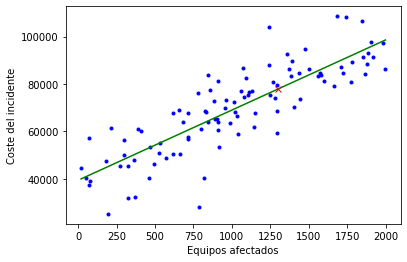

In [16]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()